In [1]:
import numpy as np
import pandas as pd
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

import matplotlib.pyplot as plt


In [2]:
sentences = [
    "I love this movie", "This film was amazing", "I enjoyed every moment",
    "The acting was great", "What a fantastic experience",
    "Absolutely wonderful movie", "The story was touching", "I liked the characters",
    "Very entertaining film", "This movie made me happy",

    "I hate this movie", "This film was terrible", "I disliked every moment",
    "The acting was awful", "What a boring experience",
    "Absolutely horrible movie", "The story was weak", "I hated the characters",
    "Very disappointing film", "This movie made me angry"
] * 5   # repeated to make 100 samples


In [3]:
labels = (
    ["positive"] * 50 +
    ["negative"] * 50
)


In [5]:
df = pd.DataFrame({
    "sentence": sentences,
    "sentiment": labels
})

print(df.head())


                      sentence sentiment
0            I love this movie  positive
1        This film was amazing  positive
2       I enjoyed every moment  positive
3         The acting was great  positive
4  What a fantastic experience  positive


In [6]:
def clean_text(text):
    text = text.lower()                 # lowercase
    text = re.sub(r"[^a-z\s]", "", text)  # remove punctuation & numbers
    return text


In [9]:
df["cleaned_sentence"] = df["sentence"].apply(clean_text)
print(df.head())

                      sentence sentiment             cleaned_sentence
0            I love this movie  positive            i love this movie
1        This film was amazing  positive        this film was amazing
2       I enjoyed every moment  positive       i enjoyed every moment
3         The acting was great  positive         the acting was great
4  What a fantastic experience  positive  what a fantastic experience


In [12]:
label_encoder = LabelEncoder()
df["sentiment_encoded"] = label_encoder.fit_transform(df["sentiment"])
#print(df.head())
df["sentiment_encoded"].head()

0    1
1    1
2    1
3    1
4    1
Name: sentiment_encoded, dtype: int64

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["cleaned_sentence"])

sequences = tokenizer.texts_to_sequences(df["cleaned_sentence"])
sequences

[[1, 19, 2, 3],
 [2, 6, 4, 20],
 [1, 21, 7, 8],
 [5, 9, 4, 22],
 [10, 11, 23, 12],
 [13, 24, 3],
 [5, 14, 4, 25],
 [1, 26, 5, 15],
 [16, 27, 6],
 [2, 3, 17, 18, 28],
 [1, 29, 2, 3],
 [2, 6, 4, 30],
 [1, 31, 7, 8],
 [5, 9, 4, 32],
 [10, 11, 33, 12],
 [13, 34, 3],
 [5, 14, 4, 35],
 [1, 36, 5, 15],
 [16, 37, 6],
 [2, 3, 17, 18, 38],
 [1, 19, 2, 3],
 [2, 6, 4, 20],
 [1, 21, 7, 8],
 [5, 9, 4, 22],
 [10, 11, 23, 12],
 [13, 24, 3],
 [5, 14, 4, 25],
 [1, 26, 5, 15],
 [16, 27, 6],
 [2, 3, 17, 18, 28],
 [1, 29, 2, 3],
 [2, 6, 4, 30],
 [1, 31, 7, 8],
 [5, 9, 4, 32],
 [10, 11, 33, 12],
 [13, 34, 3],
 [5, 14, 4, 35],
 [1, 36, 5, 15],
 [16, 37, 6],
 [2, 3, 17, 18, 38],
 [1, 19, 2, 3],
 [2, 6, 4, 20],
 [1, 21, 7, 8],
 [5, 9, 4, 22],
 [10, 11, 23, 12],
 [13, 24, 3],
 [5, 14, 4, 25],
 [1, 26, 5, 15],
 [16, 27, 6],
 [2, 3, 17, 18, 28],
 [1, 29, 2, 3],
 [2, 6, 4, 30],
 [1, 31, 7, 8],
 [5, 9, 4, 32],
 [10, 11, 33, 12],
 [13, 34, 3],
 [5, 14, 4, 35],
 [1, 36, 5, 15],
 [16, 37, 6],
 [2, 3, 17, 18, 38],
 [1,

In [14]:
max_len = 6  # max sentence length

X = pad_sequences(sequences, maxlen=max_len, padding="post")
y = df["sentiment_encoded"].values


In [15]:
print("Padded Sequences:\n", X[:5])
print("Labels:\n", y[:5])

Padded Sequences:
 [[ 1 19  2  3  0  0]
 [ 2  6  4 20  0  0]
 [ 1 21  7  8  0  0]
 [ 5  9  4 22  0  0]
 [10 11 23 12  0  0]]
Labels:
 [1 1 1 1 1]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
vocab_size = len(tokenizer.word_index) + 1

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_len),
    SimpleRNN(32),
    Dense(1, activation="sigmoid")
])


c:\Users\USER\miniconda3\envs\env_deep_learning\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [19]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=8,
    validation_data=(X_test, y_test)
)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5350 - loss: 0.6989 - val_accuracy: 0.4500 - val_loss: 0.7084
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5870 - loss: 0.6808 - val_accuracy: 0.3500 - val_loss: 0.7290
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5143 - loss: 0.6825 - val_accuracy: 0.2000 - val_loss: 0.7294
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5434 - loss: 0.6850 - val_accuracy: 0.2000 - val_loss: 0.7392
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6636 - loss: 0.6736 - val_accuracy: 0.2000 - val_loss: 0.7532
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6405 - loss: 0.6706 - val_accuracy: 0.2000 - val_loss: 0.7709
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5765 - loss: 0.6862 - val_accuracy: 0.2000 - val_loss: 0.7757
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5677 - loss: 0.6793 - val_accuracy: 0.2000 - v

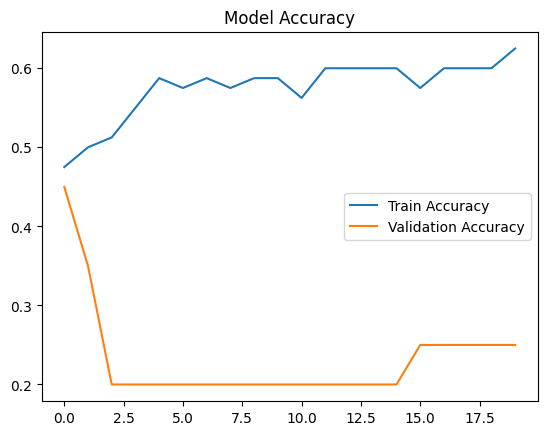

In [21]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()


In [22]:
def predict_sentiment(text):
    text = clean_text(text)
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_len, padding="post")
    prediction = model.predict(padded)
    return "Positive" if prediction[0][0] > 0.5 else "Negative"


In [23]:
print(predict_sentiment("I really enjoyed this movie"))
print(predict_sentiment("This film was very boring"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Negative
